# Using the EFD python client to query metrics from analysis_tools
**Description:** Demonstrate how to query metric values produced with [analysis_tools](https://github.com/lsst/analysis_tools)[analysis_tools](https://github.com/lsst/analysis_tools) using the EFD python client for the Sasquatch environment. 

More information at https://sasquatch.lsst.io/

**Contact authors:** Keith Bechtol

**Last verified to run:** 2024-06-27

**LSST Science Piplines version:** w_2024_25

**Container Size:** any

**Location:** This notebook was developed on the S3DF cluster at the USDF.

## Test at USDF for the ops_rehersal_prep_2k_v1
- sylvie Dagoret-Campagne
- date 2024-06-27
- w_2024_25

In [1]:
!eups list -s | grep lsst_distrib

lsst_distrib          gf193e5375e+09a23f6f84 	current w_2024_25 setup


Currently, the analysis_tools metrics are dispatched to the USDF dev Sasquatch environment, indicated with the `usdfdev_efd` alias, and are located in the `lsst.dm` database.

In [2]:
from lsst_efd_client import EfdClient
client = EfdClient("usdfdev_efd", db_name="lsst.dm")

In [3]:
import matplotlib.pyplot as plt

In [4]:
instrument = 'LSSTComCamSim'

### List Topics 

The topics correspond to individual analysis tools, e.g., as specified in the pipeline yaml file [coaddQualityCore.yaml](https://github.com/lsst/analysis_tools/blob/18877759150ddbd865aecc4be00199d1975baee4/pipelines/coaddQualityCore.yaml#L9). Consider `e1Diff` as an example.

In [5]:
topics = await client.get_topics()
for t in topics: print(t)

lsst.dm.NumDiaSources
lsst.dm.NumStreakCenterDiaSources
lsst.dm.NumStreakDiaSources
lsst.dm.ap12PsfSky
lsst.dm.astromColorDiffMetrics
lsst.dm.astromDiffMetrics
lsst.dm.blendMetrics
lsst.dm.calexpMetrics
lsst.dm.calexpSummaryMetrics
lsst.dm.calibrate
lsst.dm.coaddInputCount
lsst.dm.constantTool
lsst.dm.diaSourcesGoodVsBadRatio
lsst.dm.diffimMetadataMetric
lsst.dm.e1Diff
lsst.dm.e1DiffScatterMetric
lsst.dm.e2Diff
lsst.dm.e2DiffScatterMetric
lsst.dm.isolatedDeblenderMetrics
lsst.dm.matchedRefAngularSeparationChi
lsst.dm.matchedRefAngularSeparationDiff
lsst.dm.matchedRefCModelColorChi
lsst.dm.matchedRefCModelColorDiff
lsst.dm.matchedRefCModelFluxChiMetric
lsst.dm.matchedRefCModelMagChi
lsst.dm.matchedRefCModelMagDiff
lsst.dm.matchedRefCModelMagDiffMetric
lsst.dm.matchedRefMagChiMetric
lsst.dm.matchedRefPositionDecChi
lsst.dm.matchedRefPositionDecDiff
lsst.dm.matchedRefPositionRaChi
lsst.dm.matchedRefPositionRaDiff
lsst.dm.matchedRefPositionXChi
lsst.dm.matchedRefPositionXChiMetric
lsst.dm.

## Show the List of metrics

For a given topic, the fields correspond to metadata and metrics. As an example, the fields corresponding to metrics in the topic `e1Diff` where specified as keys in the `MetricMeasurementBundle` for the [E1Diff](https://github.com/lsst/analysis_tools/blob/18877759150ddbd865aecc4be00199d1975baee4/python/lsst/analysis/tools/atools/shapes.py#L141) class in analysis tools. 

In [6]:
#await client.get_fields("lsst.dm.e1Diff")

In [7]:
await client.get_fields("lsst.dm.stellarPhotometricRepeatability")

['band',
 'dataset_tag',
 'dataset_type',
 'day_obs',
 'detector',
 'exposure',
 'g_ct',
 'g_stellarPhotRepeatOutlierFraction',
 'g_stellarPhotRepeatStdev',
 'group',
 'i_ct',
 'i_stellarPhotRepeatOutlierFraction',
 'i_stellarPhotRepeatStdev',
 'id',
 'instrument',
 'patch',
 'physical_filter',
 'r_ct',
 'r_stellarPhotRepeatOutlierFraction',
 'r_stellarPhotRepeatStdev',
 'reference_package',
 'reference_package_timestamp',
 'reference_package_version',
 'run',
 'run_timestamp',
 'skymap',
 'timestamp',
 'tract',
 'u_ct',
 'u_stellarPhotRepeatOutlierFraction',
 'u_stellarPhotRepeatStdev',
 'visit',
 'y_ct',
 'y_stellarPhotRepeatOutlierFraction',
 'y_stellarPhotRepeatStdev',
 'z_ct',
 'z_stellarPhotRepeatOutlierFraction',
 'z_stellarPhotRepeatStdev']

In [8]:
await client.get_fields("lsst.dm.stellarPhotometricResiduals")

['band',
 'dataset_tag',
 'dataset_type',
 'day_obs',
 'detector',
 'exposure',
 'g_photResidTractMedian',
 'g_photResidTractSigmaMad',
 'g_photResidTractStdev',
 'group',
 'i_photResidTractMedian',
 'i_photResidTractSigmaMad',
 'i_photResidTractStdev',
 'id',
 'instrument',
 'patch',
 'physical_filter',
 'r_photResidTractMedian',
 'r_photResidTractSigmaMad',
 'r_photResidTractStdev',
 'reference_package',
 'reference_package_timestamp',
 'reference_package_version',
 'run',
 'run_timestamp',
 'skymap',
 'timestamp',
 'tract',
 'u_photResidTractMedian',
 'u_photResidTractSigmaMad',
 'u_photResidTractStdev',
 'visit',
 'y_photResidTractMedian',
 'y_photResidTractSigmaMad',
 'y_photResidTractStdev',
 'z_photResidTractMedian',
 'z_photResidTractSigmaMad',
 'z_photResidTractStdev']

## Query the list of Metrics

We can query a given topic using [InfluxQL syntax](https://docs.influxdata.com/influxdb/v1/query_language/explore-data). 
The resilt comes as pandas table.

Notice that the columns in the returned DataFrame match the fields above.

### Example with e1Diff

In [9]:
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d '''
query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d '''
df = await client.influx_client.query(query)
df.columns.values

array(['band', 'dataset_tag', 'dataset_tag_1', 'dataset_type', 'day_obs',
       'detector', 'exposure', 'g_ct',
       'g_stellarPhotRepeatOutlierFraction', 'g_stellarPhotRepeatStdev',
       'group', 'i_ct', 'i_stellarPhotRepeatOutlierFraction',
       'i_stellarPhotRepeatStdev', 'id', 'instrument', 'instrument_1',
       'patch', 'physical_filter', 'r_ct',
       'r_stellarPhotRepeatOutlierFraction', 'r_stellarPhotRepeatStdev',
       'reference_package', 'reference_package_timestamp',
       'reference_package_version', 'run', 'run_1', 'run_timestamp',
       'skymap', 'skymap_1', 'timestamp', 'tract', 'tract_1', 'u_ct',
       'u_stellarPhotRepeatOutlierFraction', 'u_stellarPhotRepeatStdev',
       'visit', 'y_ct', 'y_stellarPhotRepeatOutlierFraction',
       'y_stellarPhotRepeatStdev', 'z_ct',
       'z_stellarPhotRepeatOutlierFraction', 'z_stellarPhotRepeatStdev'],
      dtype=object)

Inspect the table. Each row corresponds to one `MetricMeasurementBundle` from analysis tools.

In [10]:
df

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_ct,g_stellarPhotRepeatOutlierFraction,g_stellarPhotRepeatStdev,...,u_ct,u_stellarPhotRepeatOutlierFraction,u_stellarPhotRepeatStdev,visit,y_ct,y_stellarPhotRepeatOutlierFraction,y_stellarPhotRepeatStdev,z_ct,z_stellarPhotRepeatOutlierFraction,z_stellarPhotRepeatStdev
2024-03-19 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,matchedVisitCore_metrics,None,,,122,1.639344,6.911206,...,NaN,NaN,NaN,,171.0,1.169591,6.626312,236.0,2.542373,6.431499
2024-03-20 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,matchedVisitCore_metrics,None,,,122,1.639344,6.911206,...,NaN,NaN,NaN,,171.0,1.169591,6.626312,236.0,2.542373,6.431499
2024-03-21 07:00:00+00:00,,DC2/TestMed1,DC2/TestMed1,matchedVisitCore_metrics,None,,,214,1.401869,4.508041,...,93.0,16.129032,5.369129,,206.0,0.485437,4.078023,283.0,1.766784,4.463776
2024-03-21 07:00:00+00:00,,DC2/TestMed1,DC2/TestMed1,matchedVisitCore_metrics,None,,,260,0.769231,4.433045,...,131.0,0.000000,4.834189,,277.0,0.000000,4.307512,358.0,0.000000,4.618989
2024-03-21 07:00:00+00:00,,DC2/TestMed1,DC2/TestMed1,matchedVisitCore_metrics,None,,,147,0.000000,4.395744,...,50.0,0.000000,4.954288,,140.0,0.714286,4.151194,173.0,1.156069,4.861852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0.0,0.000000,0.000000,,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,963,8.618899,16.248314,...,0.0,0.000000,0.000000,,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,69,7.246377,15.540541,...,0.0,0.000000,0.000000,,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,5552,9.888329,10.659770,...,0.0,0.000000,0.000000,,0.0,0.000000,0.000000,0.0,0.000000,0.000000


### Which instrument has metrics data

In [11]:
df["dataset_tag"].unique()

array(['HSC/RC2_subset/nightly', 'DC2/TestMed1', 'Generic', 'LATISS/DRP',
       'HSC/RC2', 'nightlyvalidation', 'intermittentcumulativeDRP'],
      dtype=object)

Suppose that we are only interested in metrics with a given tag, e.g., `HSC/RC2`. We can refine our query as follows to select on field values.

In [12]:
query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'nightlyvalidation' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
df = await client.influx_client.query(query)
df

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_ct,g_stellarPhotRepeatOutlierFraction,g_stellarPhotRepeatStdev,...,u_ct,u_stellarPhotRepeatOutlierFraction,u_stellarPhotRepeatStdev,visit,y_ct,y_stellarPhotRepeatOutlierFraction,y_stellarPhotRepeatStdev,z_ct,z_stellarPhotRepeatOutlierFraction,z_stellarPhotRepeatStdev
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,4995,4.844845,4.581051,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,7800,6.307693,5.112933,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,1020,4.607843,4.403369,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,4027,0.993295,4.448080,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,963,8.618899,16.248314,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,69,7.246377,15.540541,...,0,0,0,,0,0,0,0,0,0


In [13]:
query = '''SELECT * FROM "lsst.dm.stellarPhotometricResiduals" WHERE time > now() - 100d AND "dataset_tag" = 'nightlyvalidation' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
df2 = await client.influx_client.query(query)
df2

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_photResidTractMedian,g_photResidTractSigmaMad,g_photResidTractStdev,...,u_photResidTractMedian,u_photResidTractSigmaMad,u_photResidTractStdev,visit,y_photResidTractMedian,y_photResidTractSigmaMad,y_photResidTractStdev,z_photResidTractMedian,z_photResidTractSigmaMad,z_photResidTractStdev
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,7.011318,54.112473,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,7.952868,65.918640,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,5.813767,48.040482,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,6.032585,11.390422,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,11.573074,84.056969,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,7.872528,41.857193,...,0,0,0,,0,0,0,0,0,0


In [14]:
df.columns

Index(['band', 'dataset_tag', 'dataset_tag_1', 'dataset_type', 'day_obs',
       'detector', 'exposure', 'g_ct', 'g_stellarPhotRepeatOutlierFraction',
       'g_stellarPhotRepeatStdev', 'group', 'i_ct',
       'i_stellarPhotRepeatOutlierFraction', 'i_stellarPhotRepeatStdev', 'id',
       'instrument', 'instrument_1', 'patch', 'physical_filter', 'r_ct',
       'r_stellarPhotRepeatOutlierFraction', 'r_stellarPhotRepeatStdev',
       'reference_package', 'reference_package_timestamp',
       'reference_package_version', 'run', 'run_1', 'run_timestamp', 'skymap',
       'skymap_1', 'timestamp', 'tract', 'tract_1', 'u_ct',
       'u_stellarPhotRepeatOutlierFraction', 'u_stellarPhotRepeatStdev',
       'visit', 'y_ct', 'y_stellarPhotRepeatOutlierFraction',
       'y_stellarPhotRepeatStdev', 'z_ct',
       'z_stellarPhotRepeatOutlierFraction', 'z_stellarPhotRepeatStdev'],
      dtype='object')

Finally, access the specific metric values.

### Example with stellarPhotometricRepeatability

In [15]:
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'HSC/RC2' '''
query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 365d AND "dataset_tag" = 'nightlyvalidation' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
df = await client.influx_client.query(query)
df

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_ct,g_stellarPhotRepeatOutlierFraction,g_stellarPhotRepeatStdev,...,u_ct,u_stellarPhotRepeatOutlierFraction,u_stellarPhotRepeatStdev,visit,y_ct,y_stellarPhotRepeatOutlierFraction,y_stellarPhotRepeatStdev,z_ct,z_stellarPhotRepeatOutlierFraction,z_stellarPhotRepeatStdev
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,4995,4.844845,4.581051,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,7800,6.307693,5.112933,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,1020,4.607843,4.403369,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,4027,0.993295,4.448080,...,0,0,0,,0,0,0,0,0,0
2024-04-04 17:05:40+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,0,0.000000,0.000000,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,963,8.618899,16.248314,...,0,0,0,,0,0,0,0,0,0
2024-06-26 00:00:00+00:00,,nightlyvalidation,nightlyvalidation,matchedVisitCore_metrics,,,,69,7.246377,15.540541,...,0,0,0,,0,0,0,0,0,0


In [16]:
dataset_tag = df["dataset_tag"].unique()[0]
dataset_tag

'nightlyvalidation'

In [17]:
df["tract"].unique()[0]

'2494'

In [18]:
df["patch"].unique()[0]

''

In [19]:
df.columns

Index(['band', 'dataset_tag', 'dataset_tag_1', 'dataset_type', 'day_obs',
       'detector', 'exposure', 'g_ct', 'g_stellarPhotRepeatOutlierFraction',
       'g_stellarPhotRepeatStdev', 'group', 'i_ct',
       'i_stellarPhotRepeatOutlierFraction', 'i_stellarPhotRepeatStdev', 'id',
       'instrument', 'instrument_1', 'patch', 'physical_filter', 'r_ct',
       'r_stellarPhotRepeatOutlierFraction', 'r_stellarPhotRepeatStdev',
       'reference_package', 'reference_package_timestamp',
       'reference_package_version', 'run', 'run_1', 'run_timestamp', 'skymap',
       'skymap_1', 'timestamp', 'tract', 'tract_1', 'u_ct',
       'u_stellarPhotRepeatOutlierFraction', 'u_stellarPhotRepeatStdev',
       'visit', 'y_ct', 'y_stellarPhotRepeatOutlierFraction',
       'y_stellarPhotRepeatStdev', 'z_ct',
       'z_stellarPhotRepeatOutlierFraction', 'z_stellarPhotRepeatStdev'],
      dtype='object')

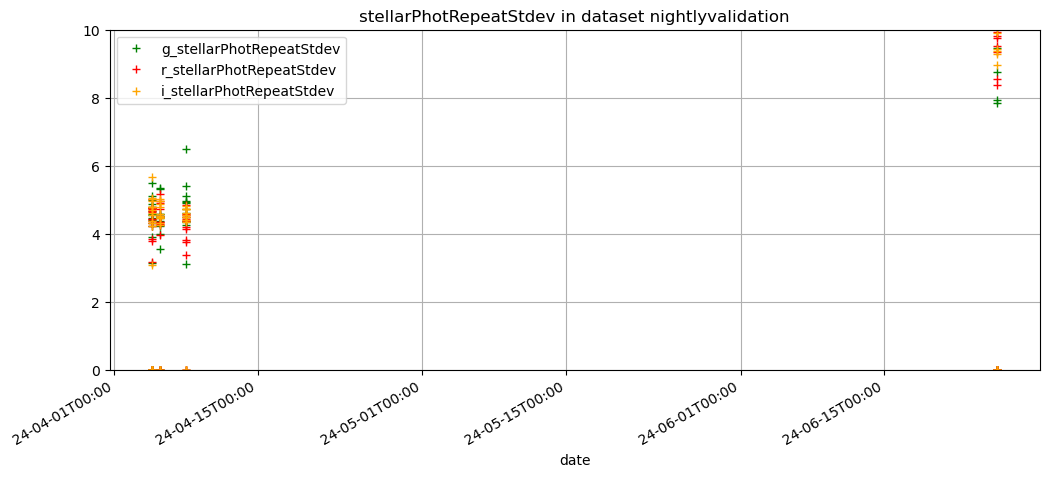

In [20]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%y-%m-%dT%H:%M")

fig,ax = plt.subplots(1,1,figsize=(12,5))
#df.plot(y="u_stellarPhotRepeatStdev",marker='+',color="b",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="g_stellarPhotRepeatStdev",marker='+',color="g",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="r_stellarPhotRepeatStdev",marker='+',color="r",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="i_stellarPhotRepeatStdev",marker='+',color="orange",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="z_stellarPhotRepeatStdev",marker='+',color="grey",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="y_stellarPhotRepeatStdev",marker='+',color="k",lw=0,legend=True,grid=True,ax=ax)

ax.set_title(f"stellarPhotRepeatStdev in dataset {dataset_tag}")
ax.set_xlabel("date")
ax.set_ylim(0.,10.)
ax.xaxis.set_major_formatter(date_form)

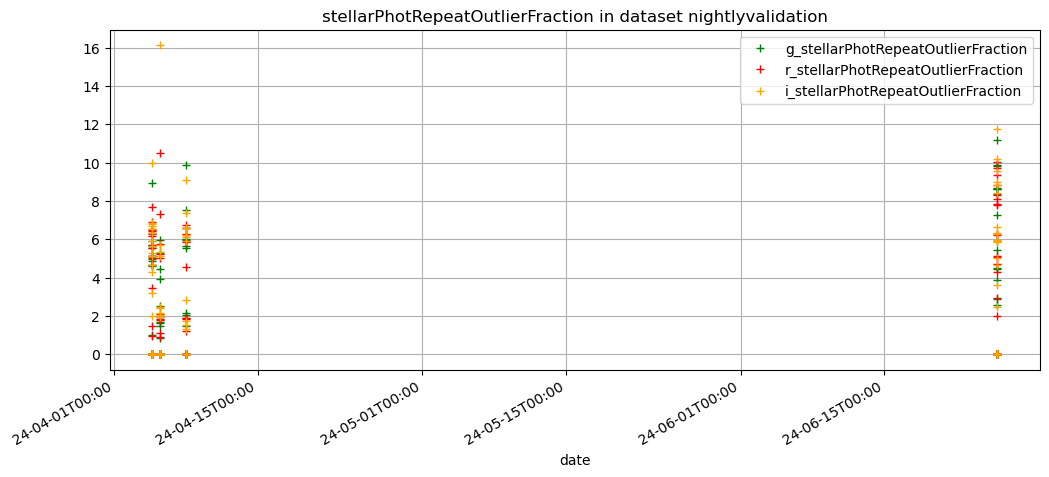

In [21]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%y-%m-%dT%H:%M")

fig,ax = plt.subplots(1,1,figsize=(12,5))
#df.plot(y="u_stellarPhotRepeatOutlierFraction",marker='+',color="b",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="g_stellarPhotRepeatOutlierFraction",marker='+',color="g",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="r_stellarPhotRepeatOutlierFraction",marker='+',color="r",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="i_stellarPhotRepeatOutlierFraction",marker='+',color="orange",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="z_stellarPhotRepeatOutlierFraction",marker='+',color="grey",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="y_stellarPhotRepeatOutlierFraction",marker='+',color="k",lw=0,legend=True,grid=True,ax=ax)

ax.set_title(f"stellarPhotRepeatOutlierFraction in dataset {dataset_tag}")
ax.set_xlabel("date")
#ax.set_ylim(0.,100.)
ax.xaxis.set_major_formatter(date_form)